$Feature$-$Selection$

- Retrival the important features

- selecting an important features is very important step before going to ML

- Droping the constant fetaures

- Information gain

- p-value

- Forward selection and backward selection

- Correlation with target column

$Method-1$:  Variance threshold method

**Droping constanat fetaures**

- If the features or variables having zero varinace

- the feature values through out the data is the same

- you can decide manually what is your desired variance in order to keep the feature

In [ ]:
import pandas as pd
dict1={'A':[100,200,300,400],
      'B':[1,2,3,4],
       'C':[10,20,30,40],
       'D':[10,10,10,10]}

df=pd.DataFrame(dict1)
df

,A,B,C,D
0,100,1,10,10
1,200,2,20,10
2,300,3,30,10
3,400,4,40,10


In [ ]:
from sklearn.feature_selection import VarianceThreshold
vt=VarianceThreshold(threshold=0)
vt.fit(df)

VarianceThreshold(threshold=0)

In [ ]:
dir(vt)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_get_param_names',
 '_get_support_mask',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_transform',
 '_validate_data',
 '_validate_params',
 'feature_names_in_',
 'fit',
 'fit_transform',
 'get_feature_names_out',
 'get_params',
 'get_support',
 'inverse_transform',
 'n_features_in_',
 'set_output',
 'set_params',
 'threshold',
 'transform',
 'variances_']

In [ ]:
df

# The column D is not changing
# The column D has same values
# Same values means the variance =0
# I keep threshld=0
# D should remove

,A,B,C,D
0,100,1,10,10
1,200,2,20,10
2,300,3,30,10
3,400,4,40,10


In [ ]:
vt.get_support()

array([ True,  True,  True, False])

if the values are constant and if one value is zero we will remove that row or column?

 - you want to drop the columns: if that column is useless
    
 - the data is not changing much:variance is zero

In [ ]:
vt.get_params()

{'threshold': 0}

In [ ]:
vt.get_support()

array([ True,  True,  True, False])

In [ ]:
cols=df.columns[vt.get_support()]
cols
# D is removed

Index(['A', 'B', 'C'], dtype='object')

In [ ]:
df[cols]

,A,B,C
0,100,1,10
1,200,2,20
2,300,3,30
3,400,4,40


In [ ]:
from sklearn.feature_selection import VarianceThreshold
vt=VarianceThreshold(threshold=0)
vt.fit(df)
cols=df.columns[vt.get_support()]
df[cols]

# Dont do on Target varaible
# while providng the data remove the target variables

,A,B,C
0,100,1,10
1,200,2,20
2,300,3,30
3,400,4,40


In [ ]:
import pandas as pd

data=pd.read_csv("C:\\Users\\omkar\\OneDrive\\Documents\\Data science\\Naresh IT\\Datafiles\\winequality_red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Apply only Input columns
# drop the target column: quality
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
# Seperate input and output column
X=data.drop('quality',axis=1)
# inplace =True  data will with out quality
# dont apply inplace True
X.columns
print(X.shape)
y=data['quality']

(1599, 11)


In [ ]:
# Here in two examples I have taken numerical data
# Will convert categorical data to numerical data before developing the ML algorithm
# thats why here im using only numerical data

In [ ]:
from sklearn.feature_selection import VarianceThreshold
vt=VarianceThreshold(threshold=1)
vt.fit(X)
cols=X.columns[vt.get_support()]
X[cols]

,fixed acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,alcohol
0,7.4,1.9,11.0,34.0,9.4
1,7.8,2.6,25.0,67.0,9.8
2,7.8,2.3,15.0,54.0,9.8
3,11.2,1.9,17.0,60.0,9.8
4,7.4,1.9,11.0,34.0,9.4
...,...,...,...,...,...
1594,6.2,2.0,32.0,44.0,10.5
1595,5.9,2.2,39.0,51.0,11.2
1596,6.3,2.3,29.0,40.0,11.0
1597,5.9,2.0,32.0,44.0,10.2


In [ ]:
if complete row is NaN can we drop NaN values

# many approaches ===== R &D
# 100 : 50 NaN

In [ ]:
import pandas as pd

data=pd.read_csv("C:\\Users\\omkar\\OneDrive\\Documents\\Data science\\Naresh IT\\Datafiles\\winequality_red.csv")
data.head()

X=data.drop('quality',axis=1)
y=data['quality']

from sklearn.feature_selection import VarianceThreshold
vt=VarianceThreshold()  # default threshold=0.0
vt.fit(X)
cols=X.columns[vt.get_support()]  # Variance=0
X[cols]

# what is the threshold you need to keep: no answer

# pH column is not removed which means its variance is not zero

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
X['pH'].std()

0.15438646490354266

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


$Method-2$:
    
**Information gain**

mutual info classify


- It is value estimating how much relationship/how much information about target variable

- 27% information about target variable

- 0 mean both variables are independent

In [ ]:
import pandas as pd

# Read the data
data=pd.read_csv("C:\\Users\\omkar\\OneDrive\\Documents\\Data science\\Naresh IT\\Datafiles\\winequality_red.csv")

#Sepearte input and target features
X=data.drop('quality',axis=1)
y=data['quality']

In [ ]:
from sklearn.feature_selection import mutual_info_classif
MI=mutual_info_classif(X,y)
MI

array([0.04715615, 0.11842476, 0.0629859 , 0.02923853, 0.05956057,
       0.03763277, 0.07775293, 0.08401173, 0.        , 0.08398851,
       0.16776668])

In [ ]:
len(MI)

11

In [ ]:
# Two methods almost enough
# Constan features ==== you need to remove
# Mutual information
val=pd.Series(MI)
val.index=X.columns
val

fixed acidity           0.047156
volatile acidity        0.118425
citric acid             0.062986
residual sugar          0.029239
chlorides               0.059561
free sulfur dioxide     0.037633
total sulfur dioxide    0.077753
density                 0.084012
pH                      0.000000
sulphates               0.083989
alcohol                 0.167767
dtype: float64

In [ ]:
val.sort_values(ascending=True)

# What is meant by pH= 0.0000 ?
# what is these all values?

# pH and target column both are indepent each other

pH                      0.000000
residual sugar          0.029239
free sulfur dioxide     0.037633
fixed acidity           0.047156
chlorides               0.059561
citric acid             0.062986
total sulfur dioxide    0.077753
sulphates               0.083989
density                 0.084012
volatile acidity        0.118425
alcohol                 0.167767
dtype: float64

<Axes: >

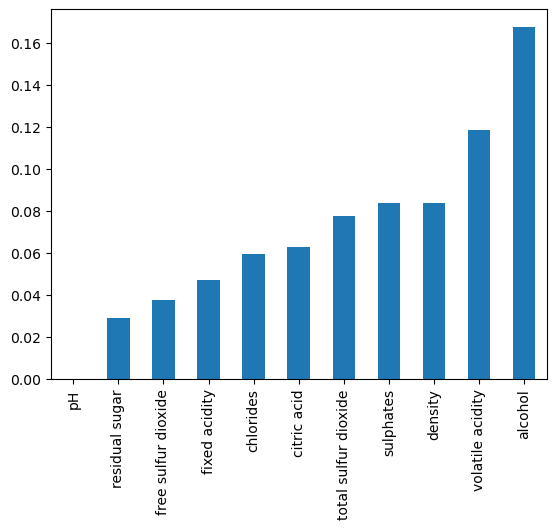

In [ ]:
val.sort_values(ascending=True).plot(kind='bar')


is this suitable for both classification and regression sir mutual info

at which step will do these feature selection

why we are splitting : x and y
    
python code will allow X and y sepeartely

thats why we are splitting

ones we extract the important fetaures , those features used to develop a model



[0.06209034 0.1151309  0.05305306 0.04103118 0.03186552 0.01151989
 0.08234434 0.08410012 0.01538596 0.11026483 0.17567737]
0     0.062090
1     0.115131
2     0.053053
3     0.041031
4     0.031866
5     0.011520
6     0.082344
7     0.084100
8     0.015386
9     0.110265
10    0.175677
dtype: float64
fixed acidity           0.062090
volatile acidity        0.115131
citric acid             0.053053
residual sugar          0.041031
chlorides               0.031866
free sulfur dioxide     0.011520
total sulfur dioxide    0.082344
density                 0.084100
pH                      0.015386
sulphates               0.110265
alcohol                 0.175677
dtype: float64


<Axes: >

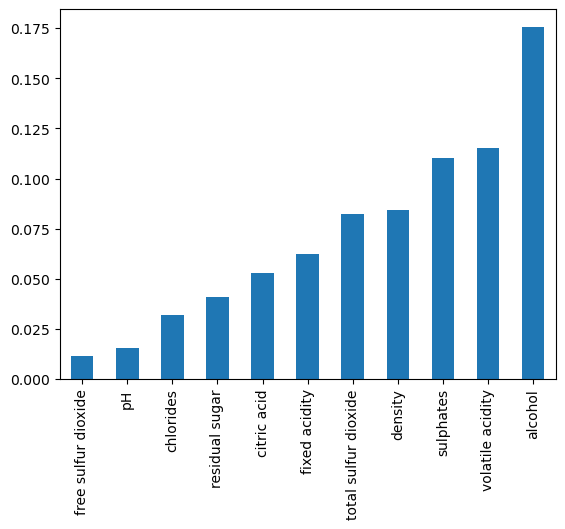

In [ ]:
import pandas as pd

# Read the data
data=pd.read_csv("C:\\Users\\omkar\\OneDrive\\Documents\\Data science\\Naresh IT\\Datafiles\\winequality_red.csv")

#Sepearte input and target features
X=data.drop('quality',axis=1)
y=data['quality']

from sklearn.feature_selection import mutual_info_classif
MI=mutual_info_classif(X,y)

print(MI)

val=pd.Series(MI)
print(val)
val.index=X.columns

val.sort_values(ascending=True)

print(val)

val.sort_values(ascending=True).plot(kind='bar')

In [ ]:
val.sort_values(ascending=True).index[:5]

Index(['residual sugar', 'pH', 'chlorides', 'free sulfur dioxide',
       'fixed acidity'],
      dtype='object')

$SelectKbest$

In [ ]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif
import pandas as pd

# Read the data
data=pd.read_csv("C:\\Users\\omkar\\OneDrive\\Documents\\Data science\\Naresh IT\\Datafiles\\winequality_red.csv")

#Sepearte input and target features
X=data.drop('quality',axis=1)
y=data['quality']

# Assume that you did not done mutual info classii
top_5=SelectKBest(mutual_info_classif,k=5)
val=top_5.fit(X,y)

In [ ]:
val.get_support()

array([False,  True, False, False, False, False,  True,  True, False,
        True,  True])

In [ ]:
val.get_feature_names_out()  # Which is True

array(['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates',
       'alcohol'], dtype=object)

In [ ]:
val.get_params()  # whatever you pass inside package

{'k': 5,
 'score_func': <function sklearn.feature_selection._mutual_info.mutual_info_classif(X, y, *, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)>}

In [ ]:
val.scores_

array([0.03971999, 0.14506135, 0.04865869, 0.04292575, 0.00302099,
       0.05350199, 0.08979522, 0.07728705, 0.00436192, 0.09787079,
       0.16016408])